### Assignment 3

In [1]:
from tensorflow import keras
import numpy as np

# Define the model
model = keras.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(1,)), 
    keras.layers.Dense(64, activation="relu"), 
    keras.layers.Dense(128, activation="relu"), 
    keras.layers.Dense(1) 
])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model training

In [13]:
from sklearn.preprocessing import MinMaxScaler

x_min, x_max = -20, 20

num_samples = 10000 
x_train = np.random.uniform(low=x_min, high=x_max, size=(num_samples, 1))
y_train = 5 * x_train**3 - 8 * x_train**2 - 7 * x_train + 1

scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_scaled = scaler.fit_transform(x_train)


In [14]:
from sklearn.model_selection import train_test_split

test_split = 0.05
val_split = 0.05

# Split data
test_split = val_split = 0.05
x_train, x_test, y_train, y_test = train_test_split(x_train_scaled, y_train, test_size=test_split + val_split, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_split / (test_split + val_split), random_state=42)

# Define optimizer and loss function
optimizer = "adam"
loss = "mse"

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))


Epoch 1/100
141/141 [==============================] - 3s 9ms/step - loss: 228846384.0000 - accuracy: 0.0000e+00 - val_loss: 224690080.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
141/141 [==============================] - 1s 5ms/step - loss: 205925632.0000 - accuracy: 0.0000e+00 - val_loss: 168543056.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
141/141 [==============================] - 1s 5ms/step - loss: 113821024.0000 - accuracy: 0.0000e+00 - val_loss: 65872608.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
141/141 [==============================] - 1s 7ms/step - loss: 48964356.0000 - accuracy: 0.0000e+00 - val_loss: 41197072.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
141/141 [==============================] - 1s 7ms/step - loss: 39744356.0000 - accuracy: 0.0000e+00 - val_loss: 38136944.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
141/141 [==============================] - 1s 6ms/step - loss: 38235444.0000 - accuracy: 0.0000e+00 - val_loss: 37631716.0000 - val_accuracy: 0.0000e+00
Epoch

### Plotting data

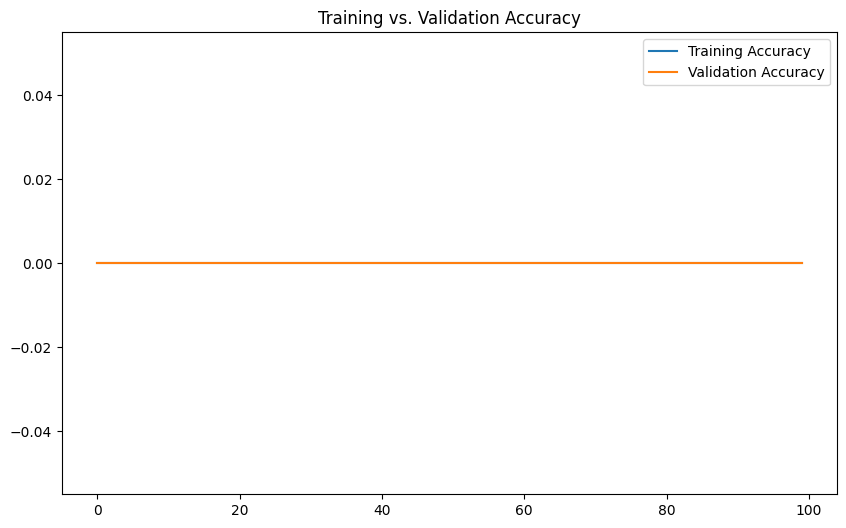

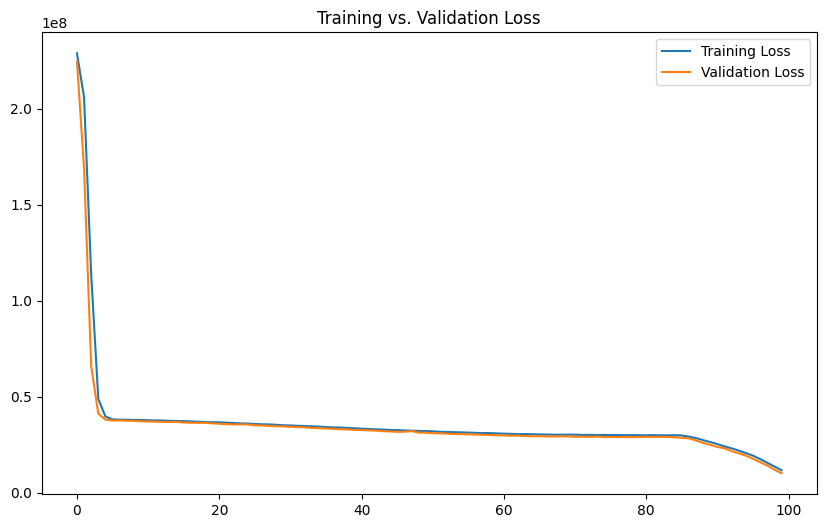

In [15]:
import matplotlib.pyplot as plt

train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(10, 6))

plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()

plt.figure(figsize=(10, 6))

plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title("Training vs. Validation Loss")
plt.legend()

plt.show()
